In [ ]:
# ADL Exercise 2 

In [2]:
# This is an implementation of the suggestion in the exercise help document 
# 
import keras 
import gc

class CleanUpCallback(keras.callbacks.Callback):

  # Callback after each epoch
  def on_epoch_end(self,epochs,logs=None):
    # print(f"Loss: {logs['loss']}")
    print("Cleaning up after each epoch to save memory")
    gc.collect()

In [3]:
# import Dataset from given link
# Get dataset from keras 
import matplotlib.pyplot as plt 
import sys
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf

# Needed libraries are imported here
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD


In [4]:
# load dataset
(trainX, trainY),(testX,testY) = cifar10.load_data()
# One hot encode label values
trainY = to_categorical(trainY)
testY = to_categorical(testY)
# Normalize the input values for the training and testing data
trainX_norm = trainX.astype('float32')
testX_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = trainX_norm / 255.0
test_norm = testX_norm / 255.0 

170508288/170498071 [==============================] - 2s 0us/step


In [11]:
# define a function to create model
# Define our model and configure it with the desired architecture
# Choosing 32 filters with a filter size of 3x3 and a stride of 1 for the first Conv layer
# 64 filters with filter size of 3x3 and a stride of 1 for the second Conv layer
# Initialize the model
# scores =[]
def create_model(learning_rate=0.01,momentum=0.0):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same' , kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Repeat the process
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform',  kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # Configure optimizer
    optimizer = SGD(learning_rate=learning_rate,momentum=momentum)
    # Configure the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainY, epochs=50, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/cifar10_optimizers/cifar10_{learning_rate}_{momentum}")
    # scores.append(history)
    # Print model summary for documentation
    model.summary()
    return model,history


Creating model...
Training model...
Epoch 1/50
313/313 [==============================] - 6s 16ms/step - loss: 2.1172 - accuracy: 0.3357 - val_loss: 1.7972 - val_accuracy: 0.4596
Epoch 2/50
313/313 [==============================] - 5s 15ms/step - loss: 1.6799 - accuracy: 0.4953 - val_loss: 1.5686 - val_accuracy: 0.5304
Epoch 3/50
313/313 [==============================] - 5s 16ms/step - loss: 1.4900 - accuracy: 0.5615 - val_loss: 1.4154 - val_accuracy: 0.5983
Epoch 4/50
313/313 [==============================] - 5s 15ms/step - loss: 1.3627 - accuracy: 0.6100 - val_loss: 1.3806 - val_accuracy: 0.6060
Epoch 5/50
313/313 [==============================] - 5s 15ms/step - loss: 1.2682 - accuracy: 0.6422 - val_loss: 1.2784 - val_accuracy: 0.6383
Epoch 6/50
313/313 [==============================] - 5s 15ms/step - loss: 1.1910 - accuracy: 0.6660 - val_loss: 1.2652 - val_accuracy: 0.6344
Epoch 7/50
313/313 [==============================] - 5s 16ms/step - loss: 1.1344 - accuracy: 0.6862 - val

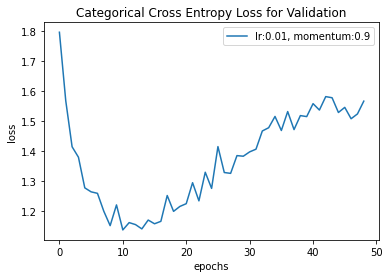

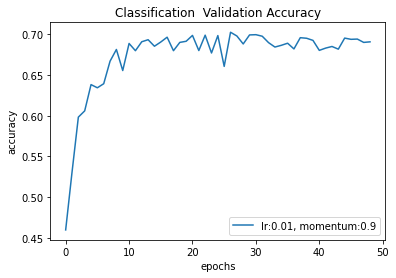

In [14]:
# Main entry point for the python application
if __name__ == "__main__":
    # Lists to hold learning rates and momentum
    parameters = [[0.01,0.7],[0.01,0.9],[0.008,0.9]]
    # parameters = [[0.01,0.9]]

    print("Creating model...")
    # Lists to hold validation losses and accuracy
    losses = []
    accuracy = []

    for param in parameters:
      print("Training model...")
      model,history = create_model(learning_rate=param[0],momentum=param[1])

      print("Storing scores...")
      # Store validation accuracy and loss 
      losses.append(history.history["val_loss"])
      accuracy.append(history.history["val_accuracy"])


    plt.plot(losses[0],label=f"lr:{parameters[0][0]}, momentum:{parameters[0][1]}")
    # plt.plot(losses[1],label=f"lr:{parameters[1][0]}, momentum:{parameters[1][1]}")
    # plt.plot(losses[2],label=f"lr:{parameters[2][0]}, momentum:{parameters[2][1]}")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Validation")
    plt.savefig("cifar10_optimizer_validation_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(accuracy[0],label=f"lr:{parameters[0][0]}, momentum:{parameters[0][1]}")
    # plt.plot(accuracy[1],label=f"lr:{parameters[1][0]}, momentum:{parameters[1][1]}")
    # plt.plot(accuracy[2],label=f"lr:{parameters[2][0]}, momentum:{parameters[2][1]}")
    plt.title("Classification  Validation Accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.savefig("cifar10_optimizer_validation_accuracy_plot.png")
    plt.legend()  
    plt.show()          

        

In [ ]:
# Using different optimizers for classification on CIFAR10 dataset

In [ ]:
# Import all optimizers to be used
# from tensorflow.keras.optimizers import Adagrad,Adam,RMSprop

In [ ]:
# Modification in the model definition function for the previous model creation function

In [ ]:
def create_model(optimizer):
    model = Sequential()
    # Add a convolution layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same' , kernel_regularizer=l2(0.001),input_shape=(32, 32, 3)))
    # Add a pooling layer
    model.add(MaxPooling2D((2, 2)))
    # Repeat the process
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform',  kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='softmax'))
    # Configure the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    # Configure Early Stopping callback
    es = EarlyStopping(monitor='loss', min_delta=0, patience=3, verbose=0, mode='auto')    
    # Train the model
    history = model.fit(train_norm, trainY, epochs=50, batch_size=128, verbose=1,validation_split=0.2,callbacks=[CleanUpCallback(),es])
    model.save(f"models/cifar10_optimizers/cifar10_{optimizer}")
    # scores.append(history)
    # Print model summary for documentation
    model.summary()
    return model,history

Creating model...
Training model...
Epoch 1/50
313/313 [==============================] - 5s 15ms/step - loss: 1.8068 - accuracy: 0.4367 - val_loss: 1.5149 - val_accuracy: 0.5381
Epoch 2/50
313/313 [==============================] - 4s 13ms/step - loss: 1.4110 - accuracy: 0.5735 - val_loss: 1.4051 - val_accuracy: 0.5837
Epoch 3/50
313/313 [==============================] - 4s 13ms/step - loss: 1.2901 - accuracy: 0.6222 - val_loss: 1.3177 - val_accuracy: 0.6098
Epoch 4/50
313/313 [==============================] - 4s 14ms/step - loss: 1.2268 - accuracy: 0.6465 - val_loss: 1.2887 - val_accuracy: 0.6278
Epoch 5/50
313/313 [==============================] - 5s 17ms/step - loss: 1.1818 - accuracy: 0.6640 - val_loss: 1.2191 - val_accuracy: 0.6583
Epoch 6/50
313/313 [==============================] - 4s 13ms/step - loss: 1.1422 - accuracy: 0.6802 - val_loss: 1.2287 - val_accuracy: 0.6521
Epoch 7/50
313/313 [==============================] - 4s 14ms/step - loss: 1.1097 - accuracy: 0.6934 - val

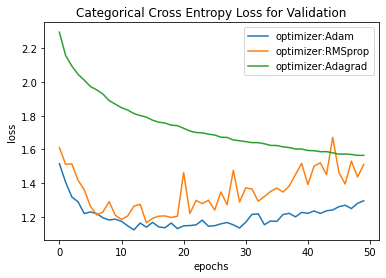

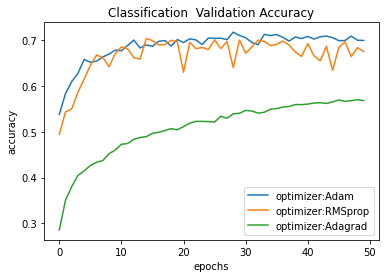

In [ ]:
# Main entry point for the python application
if __name__ == "__main__":
    # Lists to hold learning rates and momentum
    optimizers = ['Adam','RMSprop','Adagrad']

    print("Creating model...")
    # Lists to hold validation losses and accuracy
    losses = []
    accuracy = []

    for optimizer in optimizers:
      print("Training model...")
      model,history = create_model(optimizer)

      print("Storing scores...")
      # Store validation accuracy and loss 
      losses.append(history.history["val_loss"])
      accuracy.append(history.history["val_accuracy"])


    plt.plot(losses[0],label=f"optimizer:{optimizers[0]}")
    plt.plot(losses[1],label=f"optimizer:{optimizers[1]}")
    plt.plot(losses[2],label=f"optimizer:{optimizers[2]}")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.title("Categorical Cross Entropy Loss for Validation")
    plt.savefig("cifar10_optimizer_validation_loss_plot.png")
    plt.legend()  
    plt.show()

    plt.plot(accuracy[0],label=f"optimizer:{optimizers[0]}")
    plt.plot(accuracy[1],label=f"optimizer:{optimizers[1]}")
    plt.plot(accuracy[2],label=f"optimizer:{optimizers[2]}")    
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.title("Classification  Validation Accuracy")
    plt.savefig("cifar10_optimizer_validation_accuracy_plot.png")
    plt.legend()  
    plt.show()          

        

In [6]:
# Testing the model to find the loss score
from tensorflow.keras.models import load_model
import os
models_path = os.listdir("models/cifar10_optimizers/") 
cifar10_scores = []
for model in models_path:
  print(model)
  model = load_model("models/cifar10_optimizers/"+model+"/")
  results = model.evaluate(test_norm,testY,batch_size=128)
  cifar10_scores.append(results)

cifar10_Adam
79/79 [==============================] - 1s 11ms/step - loss: 1.2994 - accuracy: 0.6983
cifar10_RMSprop
79/79 [==============================] - 1s 7ms/step - loss: 1.5147 - accuracy: 0.6723
cifar10_Adagrad
79/79 [==============================] - 1s 7ms/step - loss: 1.5412 - accuracy: 0.5718
cifar10_0.01_0.9
79/79 [==============================] - 1s 7ms/step - loss: 1.5628 - accuracy: 0.6880


In [ ]:

# Printing out all the models and respective classification error rates and accuracies
# Append the SGD optimizer
optimizers.append("SGD")
print(optimizers)
for index,optimizer in enumerate(optimizers):
  print(f"{optimizers[index]} model has classification accuracy:{cifar10_scores[index][1]*100:.2f}% and classification error:{cifar10_scores[index][0] *100:.2f}%")